# Modelling the Iris Dataset

This notebook demonstrates the steps taken in analysing the iris dataset through exploration, visualisation, and training of the classification model.

The dataset can be accessed at: https://archive.ics.uci.edu/dataset/53/iris

## 1. Import Libraries

Import the libraries for fetching and handling the iris dataframes, numerical analysis, plotting, and model training and evaluation. 

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## 2. Loading the Dataset

### 2.1 Fetching

Load the iris data via the fetch_ucirepo function into two dataframes, containing the data features and data targets respectively.

In [5]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features
y = iris.data.targets

### 2.2 Metadata

The metadata for the iris dataset details that:
- This set contains 150 plant instances
- Each instance has 4 real features
- Each instance's target is one of 3 plant classes 
- The data set is balanced, containing 50 instances of each of the 3 plant classes
- One class is linearly separable from the other 2, which are themselves not linearly separable from each other

In [6]:
# metadata 
print(iris.metadata) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

### 2.3 Variable information

The variable information shown below tells us that the 4 features in the dataset are numerical dimensions of the petals and sepals in cm. 

We can identify the 3 target classes of iris as:
- Iris-setosa
- Iris-versicolor
- Iris-virginica

Lastly, we can observe that there are no missing values from the targets or any of the features.

In [25]:
# variable information 
print(iris.variables)

print("-"*80, "\n", "Unique iris plant classes:\n", y['class'].unique())

           name     role         type demographic  \
0  sepal length  Feature   Continuous        None   
1   sepal width  Feature   Continuous        None   
2  petal length  Feature   Continuous        None   
3   petal width  Feature   Continuous        None   
4         class   Target  Categorical        None   

                                         description units missing_values  
0                                               None    cm             no  
1                                               None    cm             no  
2                                               None    cm             no  
3                                               None    cm             no  
4  class of iris plant: Iris Setosa, Iris Versico...  None             no  
-------------------------------------------------------------------------------- 
 Unique iris plant classes:
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### 2.4 Dataset

Below we can see the complete iris dataset with all 150 instances of the 4 features and targets.

In [8]:
iris_df = pd.concat([X, y], axis=1)
print(iris_df)

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


### 2.5 Class distribution

We can also verify that the dataset is indeed balanced with 50 instances of each plant class.

In [26]:
y.value_counts()

class          
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## 3. Exploring the Dataset

### 3.1 Summary statistics

Below we can analyse the summary statistics of the iris dataset.

We can immediately see from the means that the 4 features are not entirely comparable in their magnitude, and as a result we will need to do feature scaling before training a model on the data, to ensure that the influence of the larger magnitude features such as sepal length does not dominate over smaller magnitude features such as petal width.

We also can see that the petal length and petal width features have a higher degree of variability in their data than sepal length and width. We hypothesise this as:
- The standard deviation relative to the mean value is high
- The distance between the 25% and 75% quartiles are high, suggesting a large spread of the data distribution

To assess whether the petal length and petal width features are discriminative, we can do further analysis to see if the high variability corresponds to distinct data ranges for the target classes. We lastly will note from the comparison of mean to median, that the petal length and petal width features have a slightly negative skew, which may support the hypothesis that the data ranges are distinct.

In [27]:
X.describe()

sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

### 3.2 Feature histograms

By plotting histograms of each feature we can better visualise the spread of data.

When doing so, we note that the sepal length and sepal width features display unimodal and normal distributions respectively. In contrast, the petal length and petal width features display bimodal distributions, and thus are key features for separating classes.

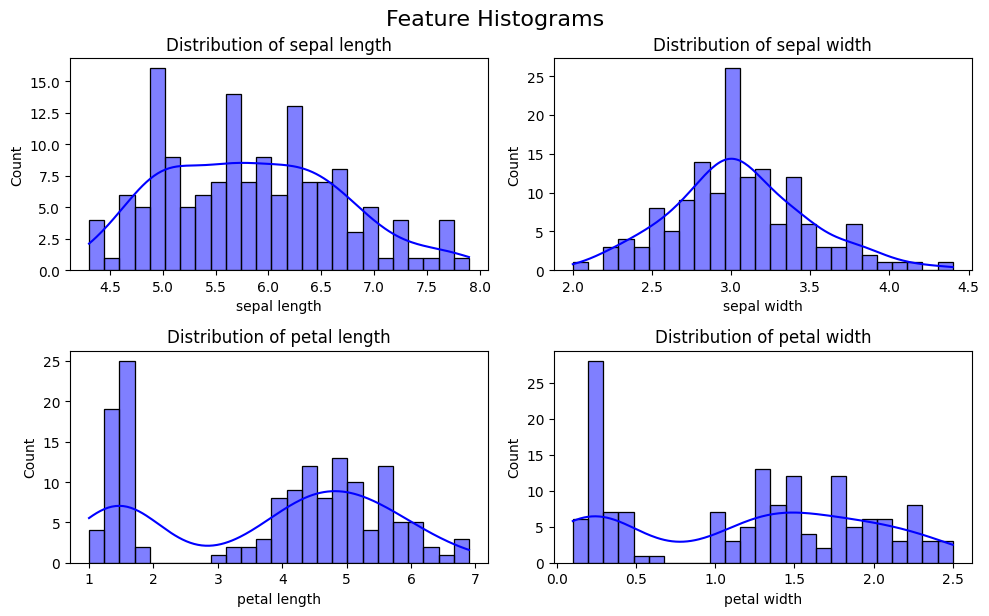

In [11]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot each feature as a histogram
for i, column in enumerate(X.columns):
    sns.histplot(X[column], bins=25, kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.suptitle("Feature Histograms", y=1.02, fontsize=16) 
plt.show()

### 3.3 Feature boxplots

Boxplots of the iris features can help us to visualise and compare the range, spread, and skewness of features, alongside identifying any potential outliers to the distributions.

We see once more that the spread of petal length and petal width is high, whilst comparably low for sepal length and sepal width. This can be understood from our previous classification of these distributions as bimodal.

We also see that the petal length and petal width features are slightly negatively skewed and that the sepal width feature contains a number of potential outliers, all of which we may need to take into account and handle before training our model.

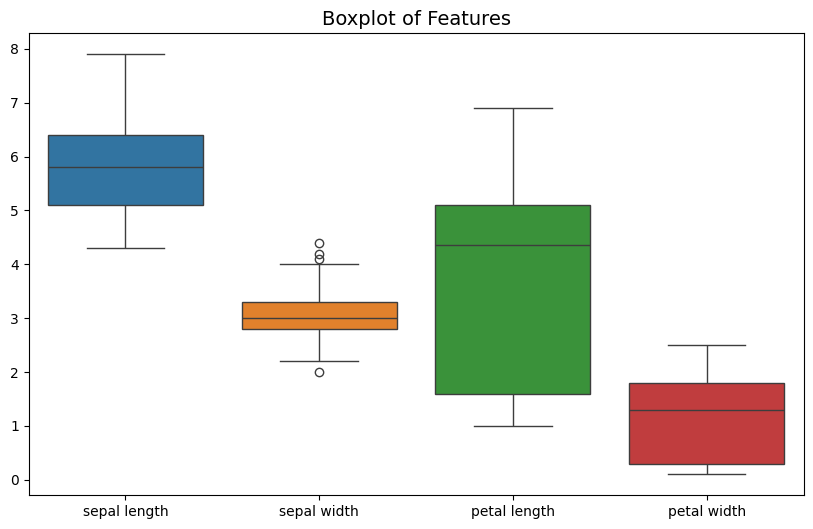

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title("Boxplot of Features", fontsize=14)
plt.show()

### 3.4 Pairplots

Pairplots of the 4 features which are labelled by class help us visualise both the individual features and inter-feature relationships.

We note immediately that in the petal length and petal width features, the iris-setosa class is distinct from the other two classes. It also posseses a narrower distribution due to its tight clustering, indicating a lower variability across these two features. We also see that the iris-versicolor and iris-virginica classes have significant overlap, although some degree of separability.

For the sepal length and sepal width features we observe poor separation for all classes, in particular iris-versicolor and iris-virginica. As a result we can conclude that petal length and petal width will be the most important features when building our classification model.

When assessing the inter-feature relationships we see a strong correlation between the petal length and petal width, suggesting these two features are interdependent. Sepal width shows poor correlation with all other features. Sepal length shows poor correlation with sepal width, but stronger correlation with petal length and petal width.

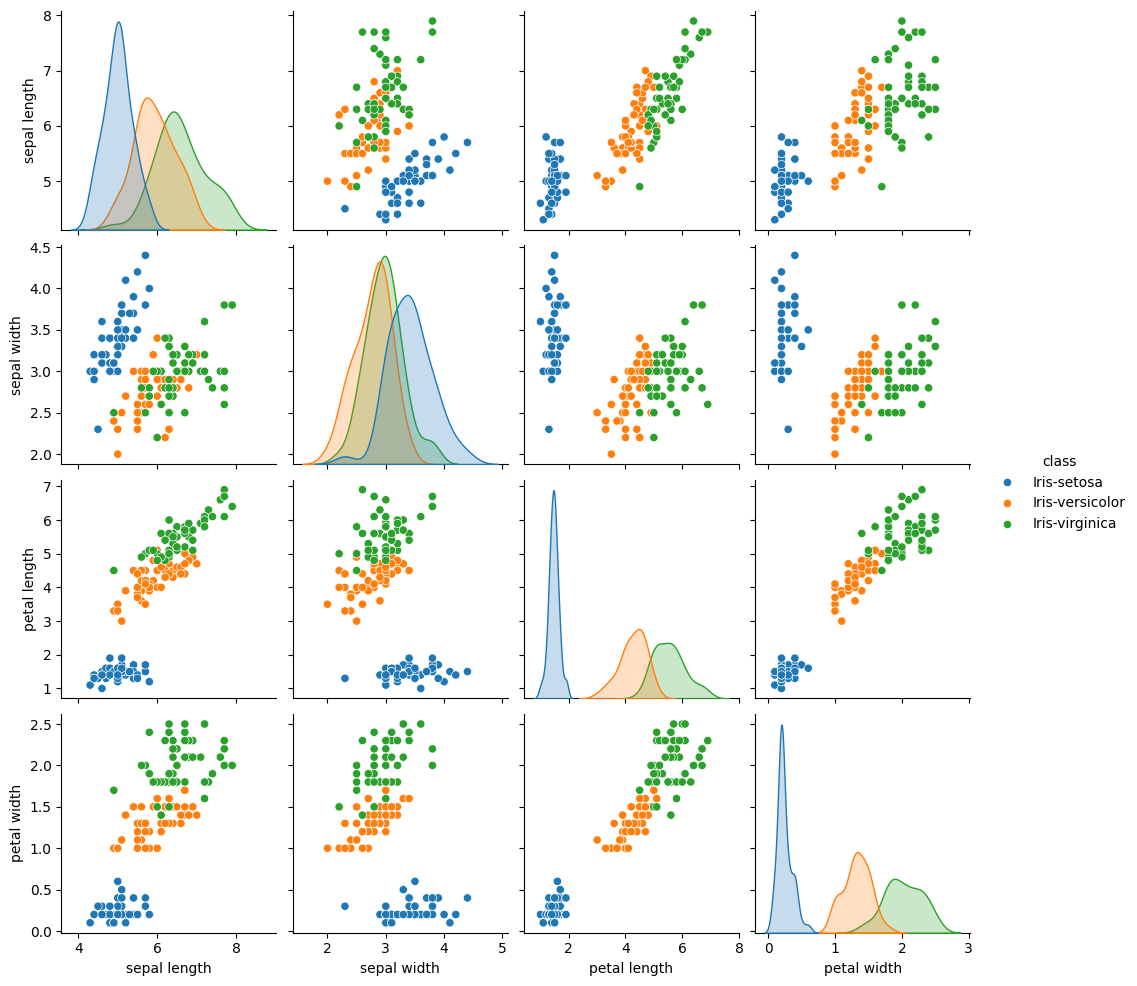

In [13]:
sns.pairplot(iris_df, hue="class")

### 3.5 Correlation matrix

We can compute a correlation matrix to quantify the correlation between features and confirm our findings.

In [14]:
correlation_matrix = X.corr()
print(correlation_matrix)

              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.109369      0.871754     0.817954
sepal width      -0.109369     1.000000     -0.420516    -0.356544
petal length      0.871754    -0.420516      1.000000     0.962757
petal width       0.817954    -0.356544      0.962757     1.000000


## 4. Data Preprocessing

### 4.1 Split data

Due to the two non-linearly separable classes (iris-versicolor and iris-virginica) in the iris dataset, a SVM with non-linear kernel (RBF) will be trained in favour of a logistic regression model.

To do this we first split the data into train and test sets with an 80:20 split. We additionally stratify the split to ensure the training and test sets maintain a balanced number of each class, as with the raw dataset.

(Note that to give a quantitative evaluation of this model in the following section we fix the random state here, however this can be removed to allow for random training and test set generation for training of the model).

In [15]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

Below we can see the 120 instances in the training set.

In [16]:
print(train_df)

     sepal length  sepal width  petal length  petal width            class
21            5.1          3.7           1.5          0.4      Iris-setosa
47            4.6          3.2           1.4          0.2      Iris-setosa
141           6.9          3.1           5.1          2.3   Iris-virginica
90            5.5          2.6           4.4          1.2  Iris-versicolor
64            5.6          2.9           3.6          1.3  Iris-versicolor
..            ...          ...           ...          ...              ...
41            4.5          2.3           1.3          0.3      Iris-setosa
93            5.0          2.3           3.3          1.0  Iris-versicolor
26            5.0          3.4           1.6          0.4      Iris-setosa
3             4.6          3.1           1.5          0.2      Iris-setosa
42            4.4          3.2           1.3          0.2      Iris-setosa

[120 rows x 5 columns]


Below we can see the 30 instances in the test set.

In [17]:
print(test_df)

     sepal length  sepal width  petal length  petal width            class
107           7.3          2.9           6.3          1.8   Iris-virginica
9             4.9          3.1           1.5          0.1      Iris-setosa
98            5.1          2.5           3.0          1.1  Iris-versicolor
11            4.8          3.4           1.6          0.2      Iris-setosa
43            5.0          3.5           1.6          0.6      Iris-setosa
0             5.1          3.5           1.4          0.2      Iris-setosa
148           6.2          3.4           5.4          2.3   Iris-virginica
111           6.4          2.7           5.3          1.9   Iris-virginica
121           5.6          2.8           4.9          2.0   Iris-virginica
76            6.8          2.8           4.8          1.4  Iris-versicolor
16            5.4          3.9           1.3          0.4      Iris-setosa
53            5.5          2.3           4.0          1.3  Iris-versicolor
112           6.8        

### 4.2 Feature scaling

SVM is sensitive to feature magnitudes and thus larger features such as sepal length can dominate over smaller features such as petal width. To prevent this, we standardise the features, setting their mean to 0 and their standard deviation to 1.

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4.3 Encoding target labels

In order to train an SVM model, the target variables must be integers instead of categorical labels. We thus use an encoder for this conversion, mapping each target class to an integer.

In [19]:
le = LabelEncoder()

# Fit the encoder on the training target and transform both train and test targets
y_train_encoded = le.fit_transform(y_train.values.ravel())
y_test_encoded = le.transform(y_test.values.ravel())

# Display the mapping
print("Class mapping:", dict(zip(le.classes_, range(len(le.classes_)))))

Class mapping: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


## 5. Training and Evaluating Model

### 5.1 Fitting training data

We train the SVM with RBF kernel model by fitting the training data. The fit method learns the decision boundary by optimizing the hyperplane in the transformed feature space.

In [20]:
# Train the SVM model
model = SVC(kernel='rbf', random_state=1)
model.fit(X_train_scaled, y_train_encoded)

SVC(random_state=1)

### 5.2 Predicting test labels

Having trained our SVM with RBF kernel model, we now use it to predict the test labels. The model takes the scaled test features as input and outputs predicted class labels. These predictions represent the model’s guesses for the true class labels in the test set.

In [21]:
# Make predictions
y_pred = model.predict(X_test_scaled)

### 5.3 Evaluating the model

Assessing the classification report for this model we find that:
- The model achieved an impressive 97% accuracy in classifying the iris types of the test set. 
- The linearly-separable iris-setosa class was perfectly classified with 1.00 across all metrics.
- There was a slight misclassification between the iris-versicolor and iris-virginica classes.

In [22]:
# Evaluate the model
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 5.4 Confusion matrix

We can generate a confusion matrix to visualise the classification results. We observe that:
- Iris-setosa is perfectly classified.
- 1 of the 10 iris-virginica is misclassified as iris-versicolor.

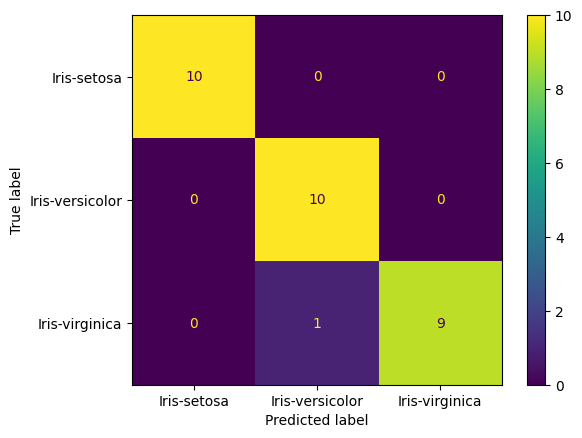

In [23]:
cm = confusion_matrix(y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='viridis')